<a href="https://colab.research.google.com/github/Calebcarp/CS290/blob/main/logregpenguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
penguins = pd.read_csv("https://github.com/mbrudd/csci290/raw/refs/heads/main/data/penguins.csv")

In [3]:
df = penguins.dropna()
label_encoders = {}

In [4]:
for column in ['species', 'island', 'sex']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

<ipython-input-4-7d561b3bd288>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
<ipython-input-4-7d561b3bd288>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
<ipython-input-4-7d561b3bd288>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [5]:
X = df[['bill_length_mm']].values
y = df['species'].values

In [6]:
binary_mask = (y == 0) | (y == 1)
X = X[binary_mask]
y = y[binary_mask]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [9]:
X_new = np.linspace(30, 60, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

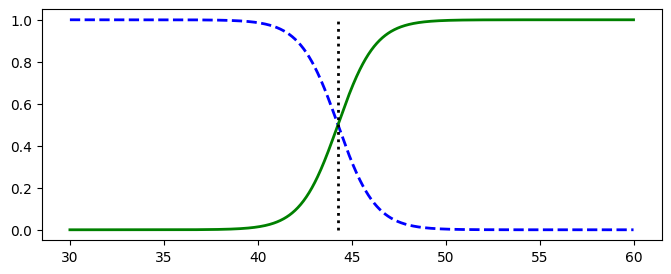

In [10]:
plt.figure(figsize=(8, 3))
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Chinstrap proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Chinstrap proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, label="Decision boundary")

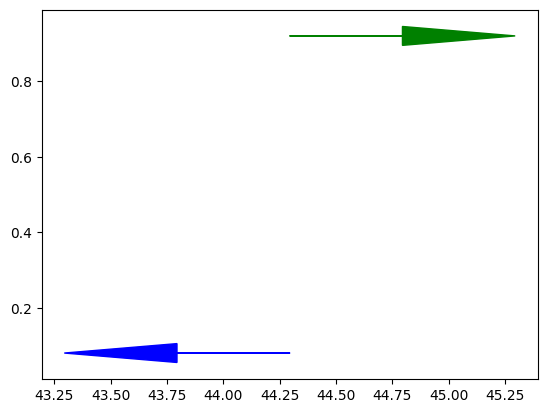

In [11]:
plt.arrow(x=decision_boundary, y=0.08, dx=-0.5, dy=0, head_width=0.05, head_length=0.5, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.5, dy=0, head_width=0.05, head_length=0.5, fc="g", ec="g")

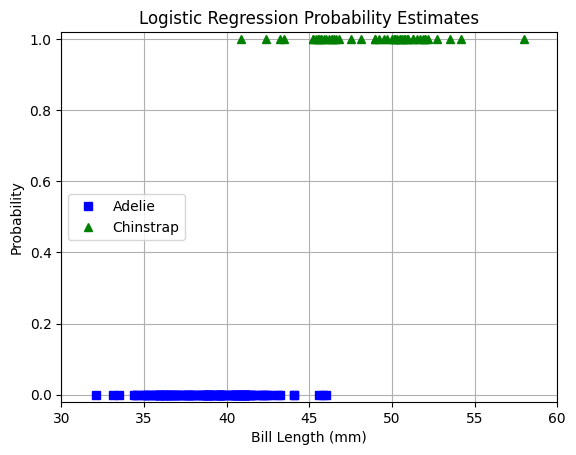

In [12]:
plt.plot(X_train[y_train == 0], np.zeros_like(X_train[y_train == 0]), "bs", label="Adelie")
plt.plot(X_train[y_train == 1], np.ones_like(X_train[y_train == 1]), "g^", label="Chinstrap")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([30, 60, -0.02, 1.02])
plt.grid()
plt.title("Logistic Regression Probability Estimates")
plt.show()

In [13]:
decision_boundary
print("Predicted classes for bill lengths 40 and 45 mm:", log_reg.predict([[40], [45]]))

Predicted classes for bill lengths 40 and 45 mm: [0 1]


In [14]:
X = df[['bill_length_mm', 'bill_depth_mm']].values
y = df['species'].values

In [15]:
binary_mask = (y == 0) | (y == 1)
X = X[binary_mask]
y = y[binary_mask]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=2, random_state=42)

In [18]:
x0, x1 = np.meshgrid(np.linspace(30, 60, 500).reshape(-1, 1),
                     np.linspace(10, 25, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

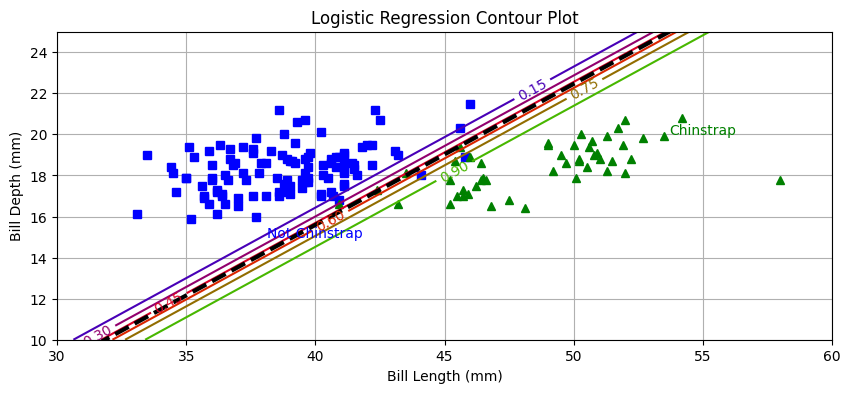

In [19]:
left_right = np.array([30, 60])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs", label="Adelie")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^", label="Chinstrap")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(40, 15, "Not Chinstrap", color="b", ha="center")
plt.text(55, 20, "Chinstrap", color="g", ha="center")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.axis([30, 60, 10, 25])
plt.grid()
plt.title("Logistic Regression Contour Plot")
plt.show()